# Exploration du jeu de données


## 1. Chargement des données

In [1]:
# imports
import numpy as np
import pandas as pd

# charting
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set(style="ticks", color_codes=True)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#plt.rcParams["figure.figsize"] = (15.0, 10.0)

In [2]:
# load the data
df_features = pd.read_csv('data/dengue_features_train.csv') 
df_labels = pd.read_csv('data/dengue_labels_train.csv')

In [3]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [8]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [9]:
df_labels['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

### Fusion des données (features et labels)

In [10]:
df_train = pd.merge(df_features, df_labels, how='inner', on=['city', 'year', 'weekofyear'])

### Gestion des unités

In [11]:
# recast 'week_start_date' as datetime object
df_features['week_start_date'] = pd.to_datetime(df_features['week_start_date'])

# recast K temperatures to C 
df_train['reanalysis_air_temp_c'] = df_train['reanalysis_air_temp_k'] - 273.15
df_train['reanalysis_avg_temp_c'] = df_train['reanalysis_avg_temp_k'] - 273.15
df_train['reanalysis_dew_point_temp_c'] = df_train['reanalysis_dew_point_temp_k'] - 273.15
df_train['reanalysis_max_air_temp_c'] = df_train['reanalysis_max_air_temp_k'] - 273.15
df_train['reanalysis_min_air_temp_c'] = df_train['reanalysis_min_air_temp_k'] - 273.15
df_train['reanalysis_tdtr_c'] = df_train['reanalysis_tdtr_k']
df_train = df_train.drop(columns=['reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
                         'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_tdtr_k'])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
reanalysis_specific_humidity_g_per_kg    1446 non-null float64
station_avg_temp_c                       1413 non-null float64
station_d

### 2. Exploration

Les features étant nombreuses, nous cherchons dans un premier temps lesquelles peuvent contribuer et/ou être redondantes.

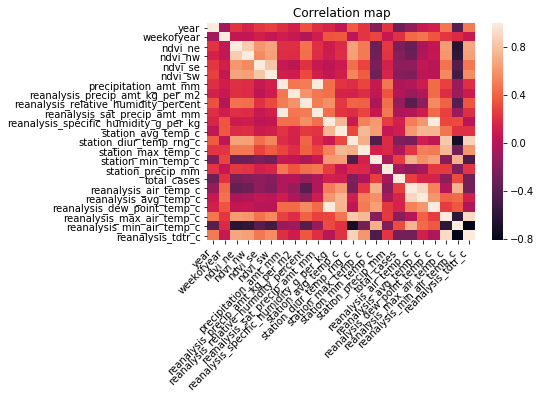

In [12]:
correlations = df_train.corr()

plt.figure()

plt.title('Correlation map')

ax = sns.heatmap(correlations,
                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [13]:
# create train dataframes for each city
df_train_sj = df_train[df_train['city'] == 'sj'].copy()
df_train_iq = df_train[df_train['city'] == 'iq'].copy()

print("San Juan data:")
print("\tSize = {}".format(df_train_sj.shape))
print("\tdate_start = {} / date_stop = {}".format(df_train_sj['week_start_date'].min(),
                                                  df_train_sj['week_start_date'].max()))

print("Iquitos data:")
print("\tSize = {}".format(df_train_iq.shape))
print("\tdate_start = {} / date_stop = {}".format(df_train_iq['week_start_date'].min(),
                                                  df_train_iq['week_start_date'].max()))

San Juan data:
	Size = (936, 25)
	date_start = 1990-04-30 00:00:00 / date_stop = 2008-04-22 00:00:00
Iquitos data:
	Size = (520, 25)
	date_start = 2000-07-01 00:00:00 / date_stop = 2010-06-25 00:00:00


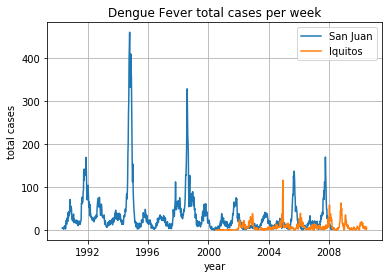

In [14]:
# Total cases per city
plt.figure()

plt.grid()
plt.title('Dengue Fever total cases per week')

plt.xlabel('year')
plt.ylabel('total cases')
plt.xticks()
plt.yticks()

plt.plot(df_train_sj['week_start_date'],
         df_train_sj['total_cases'],
         label='San Juan')
plt.plot(df_train_iq['week_start_date'],
         df_train_iq['total_cases'],
         label='Iquitos')

plt.legend()

plt.show()

In [15]:
# identify null value
df_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_cases                                0
reanalysis_air_temp_c                     10
reanalysis_avg_temp_c                     10
reanalysis_dew_point_temp_c               10
reanalysis

### 3. Premières observations

Nous remarquons que:

 - aucune *feature* ayant directement une forte corrélation avec `total_cases`.
 
 - Le nombre de cas semble avoir une saisonnalité pour San Juan, moins nette pour Iquitos. 
   - => Il peut être judicieux de distinguer les deux villes dans notre étude.
   - => à voir si cette saisonnalité découle des autres features ou s'il faut un regroupage saisonnier des semaines ?

- L'humidité et les températures moyennes et minimales semblent avoir une corrélation, comme on peut s'y attendre.

- La température maximale et la durée du jour ont une corrélation moindre: ces moustiques piquent de jour comme de nuit.

- Les corrélations des précipitations et de la végétation sont moindres, sans qu'il soit possible à ce stade d'en déduire si ces *features* sont moins importantes ou si c'est lié à un effet temporel : en effet, les précipitations sont antérieures à l'augmentation du taux d'humidité, peut-être en est-il de même pour la végétation ?
   - => il peut être judicieux d'introduire des fenêtres temporelles, prenant en compte la durée d'incubation de la maladie mais aussi le développement des moustiques ?

### 4. Redondances  : nettoyage

Nous supprimons une des colonnes en doublon (`reanalysis_sat_precip_amt_mm` et `precipitation_amt_mm`)

In [16]:
# strictly identical : remove...
df_train['delta'] = df_train['reanalysis_sat_precip_amt_mm'] - \
    df_train['precipitation_amt_mm']

df_train[['delta']].describe()

,delta
count,1443.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [17]:
df_train = df_train.drop(columns=['reanalysis_sat_precip_amt_mm','delta'])

# TODO
# to decide : do we remove one of ['reanalysis_dew_point_temp_c'] ['reanalysis_specific_humidity_g_per_kg']?
# which one ?


### 5. Valeurs manquantes

In [20]:
# identify null value
df_train_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_specific_humidity_g_per_kg      6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
total_cases                                0
reanalysis_air_temp_c                      6
reanalysis_avg_temp_c                      6
reanalysis_dew_point_temp_c                6
reanalysis_max_air_temp_c                  6
reanalysis

In [21]:
# identify null value
df_train_iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_specific_humidity_g_per_kg     4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
total_cases                               0
reanalysis_air_temp_c                     4
reanalysis_avg_temp_c                     4
reanalysis_dew_point_temp_c               4
reanalysis_max_air_temp_c                 4
reanalysis_min_air_temp_c       

In [22]:
# nous remplissons les valeurs manquantes par approximation des proches 
df_train_sj.fillna(method = 'ffill', inplace = True)
df_train_iq.fillna(method = 'ffill', inplace = True)

### 6. Végétation
NVDI indique l'indice de végétation :
- en dessous de -0.1 il s'agit probablement d'eau
- entre -0.1 et 0.1 urbanisé ou pierre ou minéral ou terre nue
- entre 0.1 et 0.4 végétation peu dense
- au dessus de 0.4 végétation dense


(à noter que les seuils ne sont pas toujours très bien définis...)



In [23]:
df_train_sj['water_ne'] = df_train_sj['ndvi_ne'] < -0.1
df_train_sj['rock_ne'] = (df_train_sj['ndvi_ne'] >= -0.1) & (df_train_sj['ndvi_ne'] < 0.1)
df_train_sj['sparse_ne'] = (df_train_sj['ndvi_ne'] >= 0.1) & (df_train_sj['ndvi_ne'] < 0.4)
df_train_sj['dense_ne'] = df_train_sj['ndvi_ne'] > 0.4

df_train_sj['water_nw'] = df_train_sj['ndvi_nw'] < -0.1
df_train_sj['rock_nw'] = (df_train_sj['ndvi_nw'] >= -0.1) & (df_train_sj['ndvi_nw'] < 0.1)
df_train_sj['sparse_nw'] = (df_train_sj['ndvi_nw'] >= 0.1) & (df_train_sj['ndvi_nw'] < 0.4)
df_train_sj['dense_nw'] = df_train_sj['ndvi_nw'] > 0.4

df_train_sj['water_se'] = df_train_sj['ndvi_se'] < -0.1
df_train_sj['rock_se'] = (df_train_sj['ndvi_se'] >= -0.1) & (df_train_sj['ndvi_se'] < 0.1)
df_train_sj['sparse_se'] = (df_train_sj['ndvi_se'] >= 0.1) & (df_train_sj['ndvi_se'] < 0.4)
df_train_sj['dense_se'] = df_train_sj['ndvi_se'] > 0.4

df_train_sj['water_sw'] = df_train_sj['ndvi_sw'] < -0.1
df_train_sj['rock_sw'] = (df_train_sj['ndvi_sw'] >= -0.1) & (df_train_sj['ndvi_sw'] < 0.1)
df_train_sj['sparse_sw'] = (df_train_sj['ndvi_sw'] >= 0.1) & (df_train_sj['ndvi_sw'] < 0.4)
df_train_sj['dense_sw'] = df_train_sj['ndvi_sw'] > 0.4



## San Juan

In [24]:
df_train_sj.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,...,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_tdtr_c
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1998.826923,26.503205,0.057726,0.066542,0.176221,0.166037,35.316485,30.401154,78.570324,16.547535,...,31.597009,22.594017,26.756838,34.180556,26.008243,26.121543,21.954736,28.243162,24.147863,2.514667
std,5.212076,15.021909,0.104907,0.091467,0.057586,0.055823,44.655240,35.532376,3.384775,1.560663,...,1.719094,1.506281,29.264050,51.381372,1.237297,1.219798,1.570075,1.259469,1.295172,0.498182
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,0.000000,66.735714,11.715714,...,26.700000,17.800000,0.000000,0.000000,22.788571,22.964286,16.492857,24.650000,19.450000,1.357143
25%,1994.000000,13.750000,0.005146,0.016100,0.137747,0.129706,0.000000,10.875000,76.246786,15.233571,...,30.600000,21.700000,6.875000,9.000000,25.043571,25.148214,20.693929,27.250000,23.150000,2.157143
50%,1999.000000,26.500000,0.056725,0.068175,0.175757,0.166900,20.450000,21.280000,78.667857,16.835000,...,31.700000,22.800000,17.650000,19.000000,26.096429,26.228571,22.301429,28.350000,24.350000,2.457143
75%,2003.000000,39.250000,0.109962,0.113512,0.211596,0.202264,51.927500,37.000000,80.952500,17.854286,...,32.800000,23.900000,35.350000,37.000000,26.980714,27.073214,23.265714,29.250000,25.250000,2.789286
max,2008.000000,53.000000,0.493400,0.437100,0.393129,0.381420,390.600000,570.500000,87.575714,19.440000,...,35.600000,25.600000,305.900000,461.000000,29.050000,29.014286,24.645714,31.150000,26.750000,4.428571


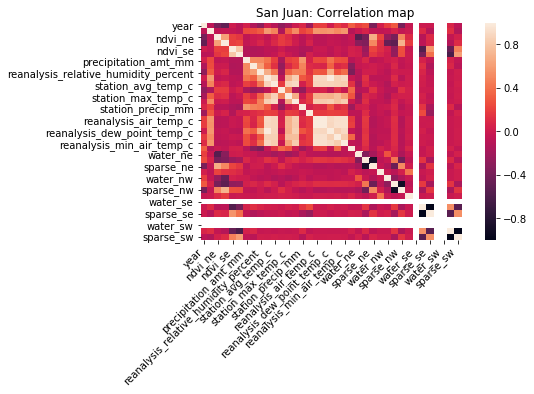

In [42]:
correlations_sj = df_train_sj.corr()

plt.figure()

plt.title('San Juan: Correlation map')

ax = sns.heatmap(correlations_sj)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [30]:
# vegetation
df_train_sj[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].describe()


,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,936.000000,936.000000,936.000000,936.000000
mean,0.057726,0.066542,0.176221,0.166037
std,0.104907,0.091467,0.057586,0.055823
min,-0.406250,-0.456100,-0.015533,-0.063457
25%,0.005146,0.016100,0.137747,0.129706
50%,0.056725,0.068175,0.175757,0.166900
75%,0.109962,0.113512,0.211596,0.202264
max,0.493400,0.437100,0.393129,0.381420


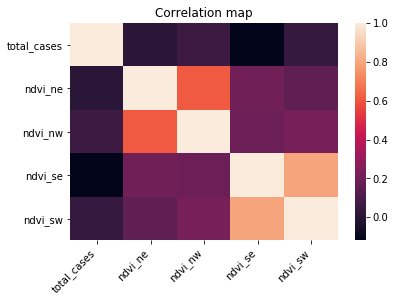

In [32]:
correlations_sj = df_train_sj[['total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']] \
    .corr()

plt.figure()

plt.title('San Juan: Correlation map')

ax = sns.heatmap(correlations_sj)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [33]:
#look for thresholds ? e.g. water -0.1 rock, sand, road... 0.1 sparse 0.4 dense
# TODO

In [34]:
# precipitations

df_train_sj[['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','station_precip_mm']].describe()

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,station_precip_mm
count,936.000000,936.000000,936.000000
mean,35.316485,30.401154,26.756838
std,44.655240,35.532376,29.264050
min,0.000000,0.000000,0.000000
25%,0.000000,10.875000,6.875000
50%,20.450000,21.280000,17.650000
75%,51.927500,37.000000,35.350000
max,390.600000,570.500000,305.900000


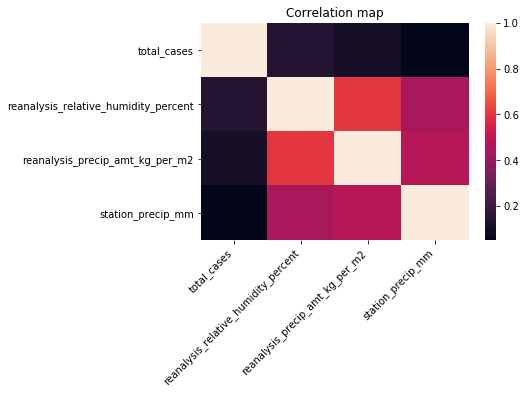

In [36]:
correlations_sj = df_train_sj[['total_cases','reanalysis_relative_humidity_percent','reanalysis_precip_amt_kg_per_m2','station_precip_mm']].corr()

plt.figure()

plt.title('San Juan: Correlation map')

ax = sns.heatmap(correlations_sj)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


In [ ]:
# humidity
df_train_sj[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_c']].describe()

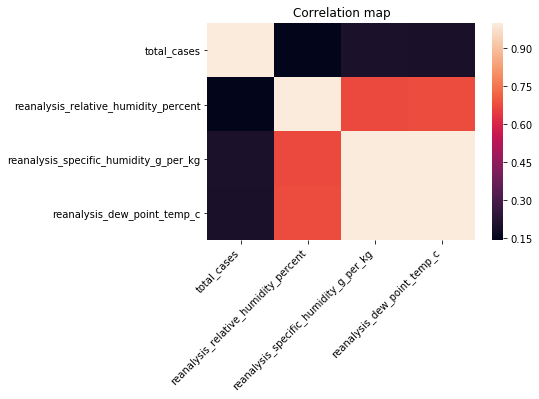

In [37]:
correlations_sj = df_train_sj[['total_cases','reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_c']].corr()

plt.figure()

plt.title('San Juan: Correlation map')

ax = sns.heatmap(correlations_sj)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [38]:
# temperatures
df_train_sj.isnull().sum()
df_train_sj[['station_avg_temp_c','reanalysis_air_temp_c','reanalysis_avg_temp_c',
            'station_max_temp_c','reanalysis_max_air_temp_c',
            'station_min_temp_c','reanalysis_min_air_temp_c',
            'station_diur_temp_rng_c','reanalysis_tdtr_c',
            'reanalysis_dew_point_temp_c']].describe()

,station_avg_temp_c,reanalysis_air_temp_c,reanalysis_avg_temp_c,station_max_temp_c,reanalysis_max_air_temp_c,station_min_temp_c,reanalysis_min_air_temp_c,station_diur_temp_rng_c,reanalysis_tdtr_c,reanalysis_dew_point_temp_c
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,26.999191,26.008243,26.121543,31.597009,28.243162,22.594017,24.147863,6.755189,2.514667,21.954736
std,1.415079,1.237297,1.219798,1.719094,1.259469,1.506281,1.295172,0.835052,0.498182,1.570075
min,22.842857,22.788571,22.964286,26.700000,24.650000,17.800000,19.450000,4.528571,1.357143,16.492857
25%,25.842857,25.043571,25.148214,30.600000,27.250000,21.700000,23.150000,6.200000,2.157143,20.693929
50%,27.214286,26.096429,26.228571,31.700000,28.350000,22.800000,24.350000,6.757143,2.457143,22.301429
75%,28.175000,26.980714,27.073214,32.800000,29.250000,23.900000,25.250000,7.285714,2.789286,23.265714
max,30.071429,29.050000,29.014286,35.600000,31.150000,25.600000,26.750000,9.914286,4.428571,24.645714


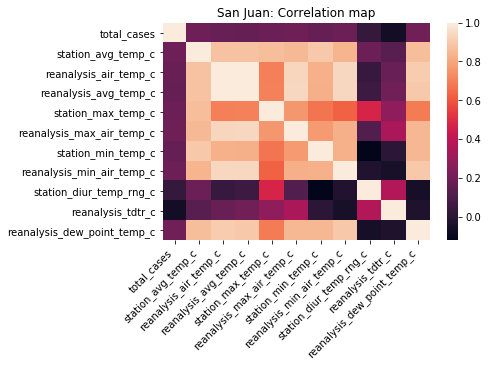

In [43]:
correlations_sj = df_train_sj[['total_cases','station_avg_temp_c','reanalysis_air_temp_c','reanalysis_avg_temp_c',
            'station_max_temp_c','reanalysis_max_air_temp_c',
            'station_min_temp_c','reanalysis_min_air_temp_c',
            'station_diur_temp_rng_c','reanalysis_tdtr_c',
            'reanalysis_dew_point_temp_c']].corr()

plt.figure()

plt.title('San Juan: Correlation map')

ax = sns.heatmap(correlations_sj)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

## Iquitos

In [40]:
df_train_iq.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,...,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_tdtr_c
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2005.000000,26.503846,0.263654,0.238813,0.250099,0.266698,64.353750,57.590500,88.666786,17.102019,...,33.966731,21.210385,61.581346,7.565385,24.719464,25.981374,22.348723,33.916923,19.729038,9.189835
std,2.918283,15.029450,0.081591,0.076733,0.077669,0.086309,35.180867,50.125737,7.580526,1.443048,...,1.355439,1.257734,62.968520,10.765478,1.171486,1.332866,1.414360,2.389779,1.662983,2.455961
min,2000.000000,1.000000,0.061729,0.035860,0.029880,0.064183,0.000000,0.000000,57.787143,12.111429,...,30.100000,14.700000,0.000000,0.000000,21.485714,21.742857,16.938571,26.850000,13.750000,3.714286
25%,2002.750000,13.750000,0.199879,0.179530,0.194607,0.203843,39.147500,24.212500,84.295000,16.121429,...,33.175000,20.600000,16.875000,1.000000,23.942500,25.067857,21.446429,32.050000,18.850000,7.371429
50%,2005.000000,26.500000,0.263528,0.233243,0.249764,0.262221,60.470000,46.440000,90.942857,17.428571,...,34.000000,21.400000,44.050000,5.000000,24.672857,25.971429,22.702143,33.850000,19.950000,8.957143
75%,2007.250000,39.250000,0.320021,0.293989,0.302550,0.324877,86.005000,71.072500,94.589643,18.180357,...,34.900000,22.000000,84.475000,9.000000,25.499286,26.973214,23.407143,35.550000,21.050000,11.003571
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,210.830000,362.030000,98.610000,20.461429,...,42.200000,24.200000,543.300000,116.000000,28.487143,29.778571,25.300000,40.850000,22.850000,16.028571


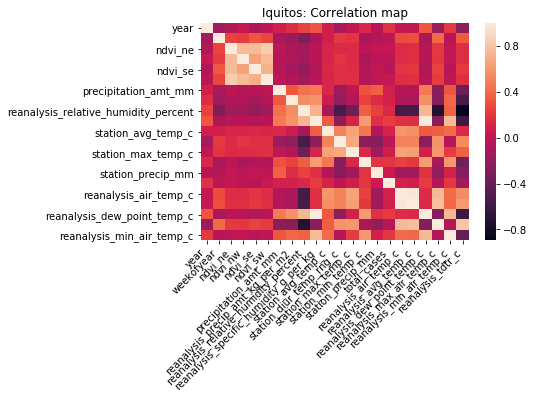

In [41]:
correlations_iq = df_train_iq.corr()

plt.figure()

plt.title('Iquitos: Correlation map')

ax = sns.heatmap(correlations_iq)
#                 xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# to fix bug in sns.heatmap (matplotlib 3.11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()